# Import Libary

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

Measure 1: Support. This says how popular an itemset is, it is number of times appear in total number of transaction. in other word we say frequency of item.
    
Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. 
    
Measure 3: Lift.  it is ratio of expected confidance to observed confidance. it is described as confidance of Y when item X was already known(x/y) to the confidance of Y when X item is unknown. in other words confidance of Y w.r.t. x and confiadnce of Y without X (means both are independent to each other).

**support = occurance of item / total no of transaction.**

**confidance = support ( X Union Y) / support(X).**

**lift = support (X Union Y)/ support(X) * support(Y) .**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Import Dataset

In [29]:
data = pd.read_excel('Bigteclean.xlsx')
data

,Doc_Date,Time,No.,All_Bill,Product_Code,Barcode,Quantity,Unit_Price,Day,Month,Year
0,2023-01-04,07:26,OL230000001,93.0,003001,003001,5.0,7.0,Wednesday,January,2023
1,2023-01-04,07:26,OL230000001,93.0,8850124003850,885012400,1.0,7.0,Wednesday,January,2023
2,2023-01-04,07:26,OL230000001,93.0,8850250000495,885025000,1.0,15.0,Wednesday,January,2023
3,2023-01-04,07:26,OL230000001,93.0,8850511421175,885051142,1.0,18.0,Wednesday,January,2023
4,2023-01-04,07:26,OL230000001,93.0,8850511421175,885051142,1.0,18.0,Wednesday,January,2023
...,...,...,...,...,...,...,...,...,...,...,...
92490,2023-10-31,23:03,0000132450,36.0,011020,011020,1.0,9.0,Tuesday,October,2023
92491,2023-10-31,23:03,0000132450,36.0,8850228005668,885022800,1.0,13.0,Tuesday,October,2023
92492,2023-10-31,23:03,0000132450,36.0,8850100003409,885010000,1.0,14.0,Tuesday,October,2023
92493,2023-10-31,23:12,0000132451,9.0,001001,001001,1.0,9.0,Tuesday,October,2023


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92495 entries, 0 to 92494
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Doc_Date      92495 non-null  datetime64[ns]
 1   Time          92495 non-null  object        
 2   No.           92495 non-null  object        
 3   All_Bill      92495 non-null  float64       
 4   Product_Code  92495 non-null  object        
 5   Barcode       92495 non-null  object        
 6   Quantity      92495 non-null  float64       
 7   Unit_Price    92495 non-null  float64       
 8   Day           92495 non-null  object        
 9   Month         92495 non-null  object        
 10  Year          92495 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 7.8+ MB


In [31]:
data.describe()

,Doc_Date,All_Bill,Quantity,Unit_Price,Year
count,92495,92495.000000,92495.000000,92495.000000,92495.0
mean,2023-06-01 19:52:16.528461056,68.601719,1.403319,19.837037,2023.0
min,2023-01-04 00:00:00,0.000000,1.000000,0.000000,2023.0
25%,2023-03-10 00:00:00,27.000000,1.000000,10.000000,2023.0
50%,2023-05-20 00:00:00,51.000000,1.000000,15.000000,2023.0
75%,2023-08-31 00:00:00,90.000000,1.000000,25.000000,2023.0
max,2023-10-31 00:00:00,907.000000,50.000000,490.000000,2023.0
std,NaN,63.476274,1.651350,16.451200,0.0


In [32]:
data.describe(exclude='number')

,Doc_Date,Time,No.,Product_Code,Barcode,Day,Month
count,92495,92495,92495,92495,92495,92495,92495
unique,NaN,1145,46061,2610,974,7,10
top,NaN,17:00,0000132357,011055,885899858,Tuesday,October
freq,NaN,157,26,1823,2959,14213,11519
mean,2023-06-01 19:52:16.528461056,NaN,NaN,NaN,NaN,NaN,NaN
min,2023-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2023-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-05-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


## Explor Data

In [33]:
top_10 = data.groupby('Month').nunique().sort_values('No.', ascending=False).head(10)
top_10

,Doc_Date,Time,No.,All_Bill,Product_Code,Barcode,Quantity,Unit_Price,Day,Year
Month,,,,,,,,,,
October,31,1121,5802,246,1535,666,19,99,7,1
September,30,1121,5766,251,1542,656,20,104,7,1
March,31,1128,5588,254,1543,663,20,100,7,1
February,28,1118,5116,247,1534,646,17,105,7,1
August,31,1064,4910,221,1528,643,16,107,7,1
May,31,1115,4657,238,1455,616,14,95,7,1
January,28,1089,4464,236,1481,626,18,102,7,1
April,26,1104,4148,232,1403,616,17,101,7,1
July,31,854,2948,200,1248,557,18,86,7,1


In [34]:
top_10_transaction = pd.DataFrame(data.groupby('Month').nunique().sort_values('No.', 
                                                                        ascending=False).head(10)['No.'])
top_10_transaction

,No.
Month,
October,5802
September,5766
March,5588
February,5116
August,4910
May,4657
January,4464
April,4148
July,2948


In [35]:
x =  pd.DataFrame(data.groupby('Product_Code').nunique().sort_values('Quantity', 
                                                                        ascending=False).head(10)['Quantity'])
x

,Quantity
Product_Code,
001010,15
8850157106702,14
8851952350161,12
003001,12
8851959139714,11
8850126000819,11
8850157107150,10
8992741905404,10
8852047412917,10


In [36]:
#Import plotly.express libraries for visualization
import plotly.express as px

# total bookings per market segment (incl. canceled)
segments=top_10_transaction

# pie plot
fig = px.pie(segments,
             values=top_10_transaction['No.'],
             names=top_10_transaction.index,
             title="Country Performance by Number of Invoice",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

/Users/borospoc/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/borospoc/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



## Create the Basket Data

In [37]:
basket = (data.groupby(['No.', 'Product_Code'])['Quantity']
               .sum().unstack().reset_index().fillna(0).set_index('No.'))
basket

Product_Code,0,000048283625,000048283793,001001,001010,001051,002002,002014,003001,008001,...,9556439883499,9556439883536,96122839,96183298,9995421399233,EXP060722A,P10107,P10108,https://a8850871362002,ผ(cid:352)(cid:352)(cid:349)(cid:344)(cid:351)(cid:352)(cid:347)(cid:344)(cid:344)(cid:346)(cid:344)(cid:352)(cid:353)
No.,,,,,,,,,,,,,,,,,,,,,
0000088114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000088115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000088116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000088117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000088118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OL230001761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OL230001762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OL230001763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Encode The Data

ในการวิเคราะห์ตะกร้าสินค้า (Market Basket Analysis) จำนวนของแต่ละรายการที่ถูกซื้อไม่ได้มีความสำคัญมากนัก สิ่งที่สำคัญคือรายการใดถูกซื้อ (1) และรายการใดไม่ถูกซื้อ (0) เพราะเราต้องการทราบว่ามีความสัมพันธ์ระหว่างการซื้อบางรายการกับการซื้อรายการอื่น ๆ ดังนั้น เราจำเป็นต้องทำการเข้ารหัสข้อมูลในตะกร้าเป็นข้อมูลทวิภาคทวิบาทที่แสดงว่ารายการใดถูกซื้อ (1) และรายการใดไม่ถูกซื้อ (0)

In [38]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_encode_plus = basket.applymap(encode_units)
basket_encode_plus

Product_Code,0,000048283625,000048283793,001001,001010,001051,002002,002014,003001,008001,...,9556439883499,9556439883536,96122839,96183298,9995421399233,EXP060722A,P10107,P10108,https://a8850871362002,ผ(cid:352)(cid:352)(cid:349)(cid:344)(cid:351)(cid:352)(cid:347)(cid:344)(cid:344)(cid:346)(cid:344)(cid:352)(cid:353)
No.,,,,,,,,,,,,,,,,,,,,,
0000088114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000088115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000088116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000088117,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0000088118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OL230001761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OL230001762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OL230001763,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Filter The Transaction : Bought More Than 1 Items Only

In [39]:
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) > 1]
basket_filter_plus

Product_Code,0,000048283625,000048283793,001001,001010,001051,002002,002014,003001,008001,...,9556439883499,9556439883536,96122839,96183298,9995421399233,EXP060722A,P10107,P10108,https://a8850871362002,ผ(cid:352)(cid:352)(cid:349)(cid:344)(cid:351)(cid:352)(cid:347)(cid:344)(cid:344)(cid:346)(cid:344)(cid:352)(cid:353)
No.,,,,,,,,,,,,,,,,,,,,,
0000088114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000088115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000088116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000088117,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0000088119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OL230001758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OL230001759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OL230001760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


จากผลลัพธ์ เห็นได้ว่ามีการซื้อทั้งหมด 24,191 รายการในชุดข้อมูลของคนที่ซื้อมากกว่า 1 รายการ คิดเป็นประมาณ 52.52% ของฐานข้อมูลตะกร้าสินค้าทั้งหมด

## Apply the Apriori Algorithm

In [40]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [41]:
from mlxtend.frequent_patterns import apriori

In [42]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.003, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

/Users/borospoc/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.058741,(011055),1
1,0.038113,(001001),1
2,0.034889,(8851952350147),1
3,0.033608,(011010),1
4,0.027407,(8851952350161),1
...,...,...,...
213,0.003059,(8850424000818),1
214,0.003059,(8851932320948),1
215,0.003059,(8858709100260),1
216,0.003018,(8851959127391),1


In [43]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  == 2) &
                        (frequent_itemsets_plus['support'] >= 0.003) ]

,support,itemsets,length
56,0.006201,"(011010, 011055)",2
57,0.006118,"(8850124003850, 8850250000495)",2
190,0.003307,"(011011, 011093)",2
196,0.003183,"(8851959142011, 001001)",2


## Finding The Association Between Frequently Bought Items

หลังจากที่ทำการใช้ Apriori algorithm เพื่อหารายการที่ถูกซื้อบ่อย, ต่อไปคือการนำไปใช้กับ association rules . จาก association rules เราสามารถแยกข้อมูลและรู้ว่ารายการไหนมีโอกาศขายรวมกันมากที่สุด

In [44]:
from mlxtend.frequent_patterns import association_rules

In [45]:
my_rules = association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(8850124003850),(8850250000495),0.022818,0.011079,0.006118,0.268116,24.201465,0.005865,1.351200,0.981067
1,(8850250000495),(8850124003850),0.011079,0.022818,0.006118,0.552239,24.201465,0.005865,2.182372,0.969420
2,(8851959142011),(001001),0.005787,0.038113,0.003183,0.550000,14.430640,0.002962,2.137526,0.936121
3,(001001),(8851959142011),0.038113,0.005787,0.003183,0.083514,14.430640,0.002962,1.084810,0.967581
4,(011011),(011093),0.016494,0.023025,0.003307,0.200501,8.707946,0.002927,1.221984,0.900007
5,(011093),(011011),0.023025,0.016494,0.003307,0.143627,8.707946,0.002927,1.148455,0.906024
6,(011010),(011055),0.033608,0.058741,0.006201,0.184502,3.140946,0.004227,1.154214,0.705329
7,(011055),(011010),0.058741,0.033608,0.006201,0.105559,3.140946,0.004227,1.080443,0.724162


(8850124003850):เนสเล่เพียวไลฟ์ 600 มล.  

(8850250000495):เบอร์ดี้แบล็ก 180 มล.

(8851959142011):โค้ก 2 ลิตร

(001001)       :น้ำแข็ง

(011011)       :ไส้กรอกจัมโบ้ชีส

(011093)	   :ไส้กรอกหนังไก่กรอบ

(011010)       :ไข่ต้ม

(011055)       :ข้าวกล่องสมายด์

In [59]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(8850250000495),(8850124003850),0.011079,0.022818,0.006118,0.552239,24.201465,0.005865,2.182372,0.969420
2,(8851959142011),(001001),0.005787,0.038113,0.003183,0.550000,14.430640,0.002962,2.137526,0.936121


In [21]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.


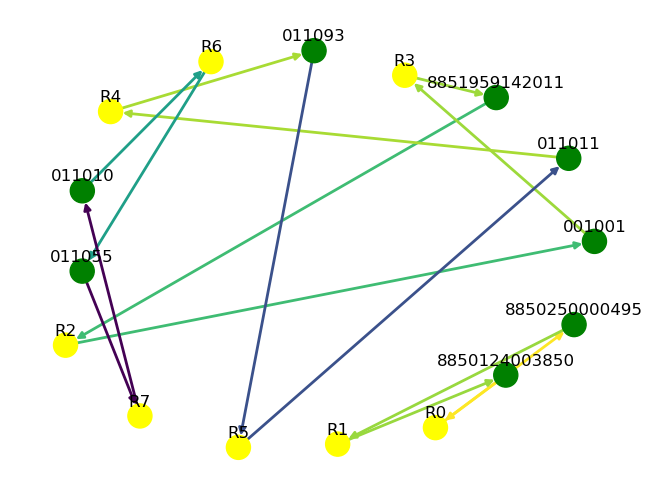

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7']

    for i in range(min(rules_to_show, len(rules))):  # Ensure rules_to_show is within bounds
        G1.add_nodes_from(["R" + str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    edge_colors = [G1[u][v]['color'] for u, v in edges]
    edge_weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, width=edge_weights, font_size=16, with_labels=False)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

# Call the function with your DataFrame and the number of rules to show
draw_graph(my_rules, 10)


## conclusion 

ในบทความนี้เราได้ทำการวิเคราะห์ตะกร้าสินค้า (Market Basket Analysis) โดยใช้ข้อมูลการทำธุรกรรมจริงจากร้านค้า BigTe. ผลลัพธ์จากการวิเคราะห์ตะกร้าสินค้านี้สามารถนำไปใช้ในการพัฒนากลยุทธ์การตลาดและการตัดสินใจได้ 
โดยเราสามารถสร้างข้อสรุปทางธุรกิจหลายประการดังนี้:

การวางสินค้า: เราสามารถวาง เนสเล่เพียวไลฟ์ 600 มล." และ เบอร์ดี้แบล็ก 180 มล." ในที่ใกล้เคียงกัน, และวางโค้กไว้ใกล้กับถังน้ำแข็ง เพื่อเพิ่มโอกาสในการซื้อร่วมกัน
    
การรวมผลิตภัณฑ์: เราสามารถจัด  เราสามารถจัด เนสเล่เพียวไลฟ์ 600 มล. และ เบอร์ดี้แบล็ก 180 มล. เป็นชุดผลิตภัณฑ์เดียวกันที่มีราคาต่ำกว่าการซื้อแยกต่างหาก. วิธีนี้สามารถดึงดูดลูกค้าให้ทำการซื้อมากขึ้นและสร้างรายได้มากขึ้น. 
    
การแนะนำและส่วนลดให้กับลูกค้า: เราสามารถวาง เบอร์ดี้แบล็ก 180 มล. ที่จุดจ่ายเงิน, เพื่อที่ทุกครั้งที่ลูกค้าซื้อ "เนสเล่เพียวไลฟ์ 600 มล." เราสามารถแนะนำและขอแนะนำให้ซื้อ "เบอร์ดี้แบล็ก 180 มล." ในราคาที่ต่ำกว่าได้. หรือจัดโปรโมชั่นซื้อน้ำแข็งแล้วลดราคาโค้กก็ได้